In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
Delivery_data = pd.read_csv("delivery_time.csv")

In [63]:
Delivery_data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [64]:
Delivery_data.rename(columns={'Delivery Time': 'Delivery', 'Sorting Time': 'Sorting'}, inplace=True)

In [65]:
Delivery_data

,Delivery,Sorting
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


## Problem Statement : Delivery_time -> Predict delivery time using sorting time 

From question:
1. Input : Sorting time
2. Output : Delivery time

## Data Understanding 

In [66]:
Delivery_data.shape

(21, 2)

In [67]:
Delivery_data.describe()

,Delivery,Sorting
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [68]:
Delivery_data.isnull().sum()

Delivery    0
Sorting     0
dtype: int64

In [69]:
Delivery_data.dtypes

Delivery    float64
Sorting       int64
dtype: object

## Assumption checking

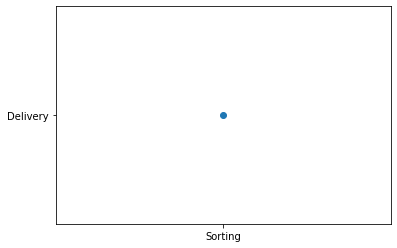

In [70]:
plt.scatter(x=['Sorting'],y=['Delivery'],data=Delivery_data)

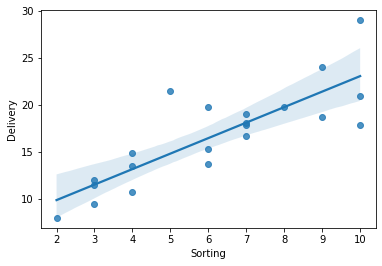

In [90]:
sns.regplot(x='Sorting',y='Delivery',data=Delivery_data)

## Model Building 

In [23]:
import statsmodels.formula.api as sfa

In [75]:
lr_model = sfa.ols(('Delivery~Sorting'),data=Delivery_data).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Delivery   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sun, 22 Aug 2021   Prob (F-statistic):           3.98e-06
Time:                        17:02:00   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
Sorting        1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
lr_model.params

Intercept    6.582734
Sorting      1.649020
dtype: float64

## Model Testing

In [92]:
Test_data = pd.DataFrame({'Sorting': [8,5,6,1,9,9,5,7]})
Test_data

,Sorting
0,8
1,5
2,6
3,1
4,9
5,9
6,5
7,7


In [93]:
lr_model.predict(Test_data)

0    19.774893
1    14.827833
2    16.476853
3     8.231754
4    21.423913
5    21.423913
6    14.827833
7    18.125873
dtype: float64

## Model Evaluation 

In [78]:
lr_model.aic , lr_model.rsquared

(106.71400170798609, 0.6822714748417231)

## Model Depolyment

In [94]:
from pickle import dump

In [102]:
dump(lr_model,open('Delivery Time.pkl','wb'))

In [103]:
from pickle import load

In [104]:
loaded_model = load(open('Delivery Time.pkl','rb'))

In [105]:
loaded_model.predict(Test_data)

0    19.774893
1    14.827833
2    16.476853
3     8.231754
4    21.423913
5    21.423913
6    14.827833
7    18.125873
dtype: float64